#LDA!!!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## this project follwed by
http://chat.openai.com

if something is worng or have some problem when you use this code, ask me anythign <3

In [ ]:
# Importing modules
import pandas as pd
import os
os.chdir('..')
# Read data into papers
df = pd.read_csv('')
# Print head
df.head()

,Title,Content,Comments
0,NaN,[[<p>Early Access games can still be really am...,[[<p>I think satisfactory is the best example ...
1,When is this gonna stop... Early Access games ...,"[[<p>​</p>, <p><a href=""https://preview.redd.i...",[[<p>Is it a fun game? Is it worth it? I feel ...
2,NaN,"[[<p>Looks good, added to wishlist !</p>]]",[[<p>Thank you!</p>]]
3,NaN,"[[<p>flashbacks to tomb raider 1, but yeah loo...","[[<p>I grew up with the N64 and GameCube, so I..."
4,NaN,"[[<p>""Just kiss already""</p>]]","[[<p>""now kith""</p>], [<p>Seems clunky</p>], [..."


In [ ]:
# Load the regular expression library
import re
# Remove unnecessary letters
df['Content'] = df['Content'].map(lambda x: re.sub('[,\.!?]', '', x))\
                                    .map(lambda x: re.sub('<p>', '', x))\
                                    .map(lambda x: re.sub('</p>','',x))\
                                    .map(lambda x: re.sub('\[\[', '', x))

df['Comments'] = df['Comments'].map(lambda x: re.sub('[,\.!?]', '', x))\
                                    .map(lambda x: re.sub('<p>', '', x))\
                                    .map(lambda x: re.sub('</p>','',x))\
                                    .map(lambda x: re.sub('\[\[', '', x))
# Print out the first rows of df
df.head()


<>:4: DeprecationWarning: invalid escape sequence \.
<>:7: DeprecationWarning: invalid escape sequence \[
<>:9: DeprecationWarning: invalid escape sequence \.
<>:12: DeprecationWarning: invalid escape sequence \[
<>:4: DeprecationWarning: invalid escape sequence \.
<>:7: DeprecationWarning: invalid escape sequence \[
<>:9: DeprecationWarning: invalid escape sequence \.
<>:12: DeprecationWarning: invalid escape sequence \[
<ipython-input-182-e88f7364ee81>:4: DeprecationWarning: invalid escape sequence \.
  df['Content'] = df['Content'].map(lambda x: re.sub('[,\.!?]', '', x))\
<ipython-input-182-e88f7364ee81>:7: DeprecationWarning: invalid escape sequence \[
  .map(lambda x: re.sub('\[\[', '', x))
<ipython-input-182-e88f7364ee81>:9: DeprecationWarning: invalid escape sequence \.
  df['Comments'] = df['Comments'].map(lambda x: re.sub('[,\.!?]', '', x))\
<ipython-input-182-e88f7364ee81>:12: DeprecationWarning: invalid escape sequence \[
  .map(lambda x: re.sub('\[\[', '', x))


,Title,Content,Comments
0,NaN,Early Access games can still be really amazing...,I think satisfactory is the best example of th...
1,When is this gonna stop... Early Access games ...,"​ <a href=""https://previewreddit/c3evgj6uphha1...",Is it a fun game Is it worth it I feel like yo...
2,NaN,Looks good added to wishlist ]],Thank you]]
3,NaN,flashbacks to tomb raider 1 but yeah looks good]],I grew up with the N64 and GameCube so I've ne...
4,NaN,"""Just kiss already""]]","""now kith""] [Seems clunky] [How does it play] ..."


# World Cloud agian,
if you don't need it, pass it.

In [ ]:
# # Importing modules
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df["Title"] = df["Title"].astype(str)
df["Content"] = df["Content"].astype(str)
df["Comments"] = df["Comments"].astype(str)

total_words_title    = " ".join(review for review in df["Title"])
total_words_content  = " ".join(review for review in df["Content"])
total_words_comments = " ".join(review for review in df["Comments"])
total_words = total_words_title + total_words_content + total_words_comments

print("Total number of words in Title:", len(total_words_title))
print("Total number of words in Content:", len(total_words_content))
print("Total number of words in Comments:", len(total_words_comments))

print("Total number of words :", len(total_words))

Total number of words in Title: 13872
Total number of words in Content: 1120298
Total number of words in Comments: 3335426
Total number of words : 4469596


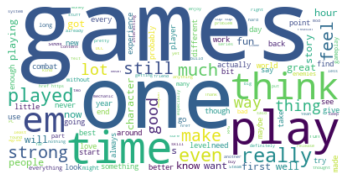

In [ ]:
# Create stopword list:
"""
if you want to extract some particular words, put in the word using "" <- ex, "one"
in stopwords.update code
I think you have to extract bunch of words..
"""
stopwords = set(STOPWORDS)
stopwords.update(["p","early","access","game"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=len(total_words), background_color="white").generate(total_words)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## Prepare data for LDA Analysis



In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','game','games','strong','play','one','get','really','time','much','think','even','also','played','early','would','hours','hour','playing','first','lot','access','got','still','way','never','people','sekiro', 'thou', 'ellie', 'bonfire', 'joel', 'tekken', 'dd', 'rapture', 'abby', 'darkwood', 'fighters', 'soulsborne', 'crush', 'trinkets', 'roguelites', 'curios', 'leon','adp', 'hawaii', 'pony', 'intel', 'expression', 'sanity', 'supergiant', 'fujian', 'acc', 'ganks', 'fromsoftware', 'palaces','ds', 'souls', 'horror', 'bosses', 'dark', 'boss', 'prey', 'bioschock', 'like', 'hades', 'Elden', 'ring', 'bloodborne', 'beat', 'combos', 'enemies', 'dd', 'poe', 'feel', 'combat', 'well', 'player', 'gameplay', 'know', 'going', 'em', 'something', 'pretty', 'run', 'back', 'actually', 'could', 'many', 'though', 'made', 'go','level', 'world', 'make', 'better', 'every', 'see', 'point', 'things', 'thing', 'around', 'years', 'since', 'long', 'need', 'always', 'find', 'dlc', 'year','steam', 'good', 'years', 'gta', 'fallout', 'survival', 'quests','quest','subnautica', 'missions', 'deals', 'grind', 'switch', 'base', 'witcher', 'last', 'osrs', 'rs', 'prawn', 'cyclops', 'exponential', 'smt', 'nv', 'geralt', 'ty', 'metric', 'representation', 'redditor', 'metascorce', 'seamoth', 'evaluating', 'subs', 'graph', 'gaugepowered', 'runescape', 'scaling', 'crysis', 'lifeless', 'gw', 'legendary', 'dog', 'tw', 'xenoblade', 'imperialism', 'sp', 'enough', 'fighting', 'sure', 'getting', 'gaming', 'probably', 'right', 'release', 'say', 'old', 'take', 'two', 'less', 'patient', 'day', 'bought', 'wait', 'stuff', 'maybe', 'factorio', 'nintendo', 'vr', 'flash', 'community', 'cells', 'uplay', 'median', 'darkest', 'fighter', 'persona', 'per', 'street', 'moo', 'demos', 'palace', 'herbal', 'guidelines', 'boons', 'ksp', 'portability', 'fgc', 'festival', 'lego', 'submachine', 'wiiu', 'millions', 'publishers', 'victoria', 'torchlight', 'cloud', 'stygian', 'fortnite', 'spd', 'fifa', 'gpus', 'bike', 'href', 'com','sup', 'store', 'steampowered', 'app', 'https', 'little', 'want', 'bit', 'characters', 'character', 'enough', 'try', 'felt', 'list', 'usd', 'definitely', 'ever', 'open', 'http', 'br', 'op', 'co', 'platformer', 'own', 'city', 'fantasy', 'vaan', 'xa', 'rating', 'ffxii', 'drg', 'scary', 'neverwinter', 'tactics', 'amid', 'alien', 'oc', 'fear', 'psp', 'siraymando', 'dusk', 'lotr', 'modules', 'penelo', 'fellowship', 'balthier', 'investigation', 'docs', 'gujian', 'unsettling', 'gambit', 'award', 'unw', 'ykvtxwwgtty', 'hu', 'gid', 'bfc', 'vn', 'aribeth', 'gambits', 'gwent', 'rtwp', 'series', 'anything', 'feels', 'end', 'system', 'span', 'makes', 'part', 'spoiler', 'riven', 'dayz', 'another', 'everything', 'big', 'times', 'pc', 'without', 'yeah', 'far', 'give', 'work', 'main', 'least', 'players', 'almost', 'online', 'away', 'trying', 'far', 'found', 'might', 'look', 'myst', 'yet', 'version', 'kind', 'remember', 'start', 'put', 'thought', 'full', 'free', 'already', 'said', 'rpg', 'agree', 'looking', 'etc', 'keep', 'keeping', 'kept', 'design', 'enjoyed', 'dead', 'dungeon', 'reason', 'completely', 'real', 'come', 'either', 'mods', 'build', 'making', 'space', 'half', 'graphics', 'ps', 'hard', 'edit', 'www', 'especially', 'amp', 'favorite','fps', 'difficulty', 'shooters', 'bioshook', 'arr', 'factory', 'summer', 'non', 'thief', 'integrated', 'enemy','ys', 'elden', 'heroes', 'progression', 'ffxiv', 'lara', 'items', 'review', 'ff', 'overgrowth', 'damage', 'attack', 'tutorial', 'deck', 'raider', 'quite', 'finished', 'nothing', 'released', 'loved', 'later', 'next', 'came', 'finish', 'friends', 'else', 'single', 'basically', 'weapons', 'enemy', 'thanks', 'easy', 'absolutely', 'second', 'building', 'fight', 'post', 'map', 'loved', 'whole', 'mechanics', 'someone', 'genre', 'side', 'seems', 'able', 'items', 'may', 'cool', 'based', 'life', 'nofollow', 'real', 'multiplayer', 'let', 'action', 'however', 'done', 'style', 'wanted', 'tried', 'content', 'skill', 'short', 'mean', 'problem', 'example', 'sense', 'weapon', 'hit', 'skyrim', 'entire', 'bioshock', 'fact', 'class', 'complete', 'ago', 'final', 'update', 'updates', 'devs', 'everyone', 'text', 'levels', 'often', 'top', 'liked', 'started', 'rel', 'yes', 'set', 'place', 'gets', 'read', 'rather', 'high', 'super', 'minecraft', 'gamer', 'video', 'amount', 'mostly', 'help', 'used', 'months', 'month', 'titles', 'learn', 'console',  'mario', 'wii', 'low', 'smash', 'looks', 'bg', 'beta', 'team', 'deleted', 'dos', 'experience', 'battlerite', 'mode', 'support', 'mod', 'ow', 'ea', 'issue', 'launch', 'xbox', 'hope', 'saying', 'understand', 'demo', 'engine', 'development', 'features', 'dev', 'using', 'spy', 'support', 'doom', 'unreal', 'seen', 'instead',
'roguelike', 'epic', 'urns', 'rogue', 'art', 'school', 'huge', 'trailer', 'change', 'easier', 'idea', 'ghost', 'similar', 'oh', 'us', 'roguelite', 'larian', 'turn', 'ship', 'act', 'gate', 'guess', 'ever', 'space', 'party', 'spells', 'add', 'means', 'roll', 'chance', 'dune', 'rts', 'campaign', 'war', 'modern', 'movie', 'mw', 'warfare', 'us', 'add', 'call', 'overwatch', 'maps', 'battle', 'nan', 'reviews', 'working', 'work', 'project', 'lol', 'user', 'warband', 'cart', 'cards', 'banner', 'went', 'shopping', 'anyone', 'title', 'name', 'literally', 'means', 'server', 'small', 'fine', 'honestly', 'wrong', 'usually', 'days', 'nice', 'exactly', 'servers', 'performance', 'postal', 'pvp', 'units', 'egs', 'future', 'added', 'seem', 'sounds', 'sound', 'pass', 'tell', 'told', 'actual', 'product', 'youtube', 'check', 'forward', 'baldur', 'save', 'man', 'kinda', 'works', 'removed', 'pick', 'runs', 'run', 'available', 'couple', 'person', 'people', 'divinity', 'comes', 'come', 'gonna', 'going', 'to', 'coming', 'came', 'currently', 'current', 'clear', 'clearly', 'needs', 'need', 'true', 'truth', 'guy', 'developers', 'saw', 'water', 'unity', 'ships', 'ship', 'ai', 'bf', 'test','tested','tests', 'studio', 'seeing', 'running', 'ue',
'thank', 'fan', 'move', 'moved', 'guys', 'changes', 'ones', 'one', 'damn', 'everspace', 'number', 'random', 'likely', 'developer', 'behind', 'front', 'page', 'gear', 'ways', 'way', 'model', 'systems', 'system', 'spiders','spider', 'cod', 'rest', 'edition', 'points', 'point', 'room', 'rooms', 'imo', 'dnd', 'th','expect', 'expected', 'sort', 'called', 'call', 'sequel', 'wish', 'case', 'close', 'die', 'died', 'unless', 'solo', 'care', 'others', 'other', 'left', 'core', 'course', 'ton', 'options', 'option', 'simple', 'rule', 'rules', 'deals', 'deal', 'mind', 'company', 'general', 'book', 'sale', 'fair', 'monster', 'believe', 'belief', 'big', 'biggest', 'sometime', 'sometimes', 'compare', 'compared', 'imagine', 'movement', 'past', 'information', 'voice', 'competitive', 'strategy', 'bunch', 'depth', 'fast', 'resources', 'resource', 'easily', 'easier', 'night', 'swat', 'modding', 'possible', 'matter', 'temtem', 'stardew', 'deep', 'bastion', 'type', 'types', 'ghosts', 'minute', 'minutes', 'basic', 'talking', 'talk', 'fully', 'full', 'hero', 'music', 'hope', 'hopefully', 'shoot', 'shooter', 'shooting', 'soldat', 'plan', 'prison', 'planned', 'parts', 'drama', 'fans', 'fan', 'sim','dude', 'discord', 'star', 'missing', 'eventually', 'pve', 'wwwyoutubecom', 'soon', 'sooner', 'roguelikes', 'group', 'code', 'ark', 'blade', 'due', 'kill', 'killed', 'dialogue', 'age', 'exploration', 'explore', 'heard', 'hear','item', 'ready', 'forest', 'stellaris', 'management', 'manage', 'legacy', 'army', 'supposed', 'suppose', 'together', 'complex', 'multiple', 'state', 'zero', 'specific', 'extreme', 'extremely', 'specifically', 'what', 'whatever', 'melee', 'goes', 'card', 'question', 'control', 'controls', 'take', 'takes', 'patch', 'stadia', 'google', 'amazon', 'royale', 'paragon', 'streaming', 'stream', 'eternal', 'whip', 'watchv', 'shift','simply', 'personally', 'focus', 'sniper', 'arena', 'rock', 'balance', 'order', 'latter', 'decks', 'tems', 'vs', 'mission', 'missions', 'stop', 'solid', 'champions', 'champion','variety', 'various', 'lost', 'show', 'spell', 'took', 'taken', 'get', 'elite', 'important', 'importantly', 'bonus', 'says','unlock', 'lock', 'major', 'watch', 'wonder', 'watched', 'plays', 'users', 'user', 'use','think', 'thinking', 'rimworld', 'announce', 'announced', 'land', 'miss', 'company', 'companies', 'magic', 'coop', 'control', 'controller', 'problems','architect', 'xcom', 'wow', 'recent', 'recently', 'freelancer', 'expansion', 'expand', 'planet','certain', 'concept', 'limit', 'limited', 'taking', 'mobile', 'anymore', 'duty', 'loot', 'skullgirls','dont', 'terraria','dauntless','daunt', 'pubg', 'plus', 'except'
])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]
data = df.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['amazing', 'fun', 'totally', 'worth', 'money', 'besides', 'promises', 'satisfactory', 'best', 'purchased', 'fun', 'whelming', 'story', 'excited', 'great', 'forget', 'raft', 'forget', 'dyson', 'sphere', 'program', 'pioneer', 'dsp', 'sitting', 'counting', 'worth', 'valheim', 'technically', 'several', 'expecting']


In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 5), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 2), (27, 1), (28, 6), (29, 3)]


### LDA model Training

In [ ]:
from pprint import pprint
# number of topics
num_topics = 20
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

[(0,
  '0.010*"money" + 0.007*"new" + 0.006*"shit" + 0.006*"alpha" + 0.006*"bad" + '
  '0.005*"great" + 0.005*"fun" + 0.004*"pre" + 0.004*"buy" + 0.003*"price"'),
 (1,
  '0.005*"new" + 0.005*"fun" + 0.004*"money" + 0.004*"shit" + 0.004*"great" + '
  '0.004*"love" + 0.003*"buy" + 0.003*"amazing" + 0.003*"best" + '
  '0.003*"dreadtides"'),
 (2,
  '0.010*"money" + 0.008*"buy" + 0.007*"great" + 0.006*"new" + 0.005*"best" + '
  '0.004*"fun" + 0.004*"pay" + 0.004*"pre" + 0.003*"shit" + 0.003*"alpha"'),
 (3,
  '0.007*"money" + 0.006*"new" + 0.005*"love" + 0.005*"alpha" + 0.005*"buy" + '
  '0.005*"fun" + 0.004*"price" + 0.004*"shit" + 0.003*"bad" + 0.003*"awesome"'),
 (4,
  '0.008*"new" + 0.007*"great" + 0.007*"buy" + 0.005*"money" + 0.004*"fun" + '
  '0.004*"shit" + 0.004*"love" + 0.004*"pre" + 0.004*"best" + 0.003*"bad"'),
 (5,
  '0.008*"money" + 0.007*"great" + 0.006*"new" + 0.005*"buy" + 0.004*"fun" + '
  '0.004*"pay" + 0.004*"bad" + 0.003*"love" + 0.003*"shit" + 0.003*"pre"'),
 (6,
  '0.0

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)


In [ ]:
pip install pyldavis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyLDAvis.gensim
import gensim

# Load the data and preprocess it

# Train the model
lda_model = gensim.models.LdaModel(corpus, num_topics=3, id2word=id2word, passes=10)

# Prepare the data for visualization
vis_data = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

# Display the visualization in a web browser
pyLDAvis.display(vis_data)

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
# If you want to save use this!
pyLDAvis.save_html(vis_data, '/content/lda_vis.html')

The main components of the pyLDAvis visualization are:

* A scatter plot that shows the position of each topic in the low-dimensional space. The size of each circle represents the relative importance of the topic, and the distance between the circles represents the similarity between the topics.

* A bar chart that shows the most relevant terms for the currently selected topic. The terms are ranked by their frequency in the corpus and their relevance to the topic.

* A word cloud that shows the most frequent terms in the corpus, with the size of each word proportional to its frequency.

* A topic list that shows the topics and their most relevant terms. The terms are color-coded according to their frequency in the corpus and their relevance to the topic.

Using pyLDAvis, you can interactively explore the topics and terms, select different topics and see their most relevant terms, and compare the topics to each other. This can be a useful tool for analyzing the output of a topic model and gaining insights into the underlying structure of the corpus.